![Illustration of silhouetted heads](mentalhealth.jpg)

Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

In [96]:
-- Run this code to view the data in students
SELECT * 
FROM students;

inter_dom region  gender  ... alone_bi  others_bi  internet_bi
0       Inter    SEA    Male  ...       No         No           No
1       Inter    SEA    Male  ...       No         No           No
2       Inter    SEA    Male  ...       No         No           No
3       Inter     EA  Female  ...       No         No           No
4       Inter     EA  Female  ...       No         No           No
..        ...    ...     ...  ...      ...        ...          ...
281                           ...                                 
282                           ...                                 
283                           ...                                 
284                           ...                                 
285                           ...                                 

[286 rows x 50 columns]

# Import Section

In [1]:
import numpy as np
import pandas as pd

In [2]:
students = pd.read_csv('students.csv')

# EDA

## Features Selection and Filter

In [3]:
print(students.head())

  inter_dom region  gender academic   age  age_cate  stay stay_cate  japanese  \
0     Inter    SEA    Male     Grad  24.0       4.0   5.0      Long       3.0   
1     Inter    SEA    Male     Grad  28.0       5.0   1.0     Short       4.0   
2     Inter    SEA    Male     Grad  25.0       4.0   6.0      Long       4.0   
3     Inter     EA  Female     Grad  29.0       5.0   1.0     Short       2.0   
4     Inter     EA  Female     Grad  28.0       5.0   1.0     Short       1.0   

  japanese_cate  ...  friends_bi parents_bi relative_bi professional_bi  \
0       Average  ...         Yes        Yes          No              No   
1          High  ...         Yes        Yes          No              No   
2          High  ...          No         No          No              No   
3           Low  ...         Yes        Yes         Yes             Yes   
4           Low  ...         Yes        Yes          No             Yes   

  phone_bi doctor_bi religion_bi  alone_bi others_bi  internet

In [4]:
selected_column = ["stay","todep","tosc","toas"]
selected_students = students.loc[students["inter_dom"] == "Inter"][selected_column]
print(selected_students.head())
print(selected_students.shape)

   stay  todep  tosc  toas
0   5.0    0.0  34.0  91.0
1   1.0    2.0  48.0  39.0
2   6.0    2.0  41.0  51.0
3   1.0    3.0  37.0  75.0
4   1.0    3.0  37.0  82.0
(201, 4)


## Handle Missing Values

In [5]:
selected_students.isna().sum()

stay     0
todep    0
tosc     0
toas     0
dtype: int64

In [6]:
drop_na_students = selected_students.dropna()
drop_na_students.isna().any()

stay     False
todep    False
tosc     False
toas     False
dtype: bool

## Analytics

In [7]:
grouped_stay = pd.DataFrame()
grouped_stay["count_int"] = drop_na_students.groupby("stay")["stay"].value_counts()
grouped_stay.head()

count_int
stay           
1.0          95
2.0          39
3.0          46
4.0          14
5.0           1

<Axes: xlabel='stay'>

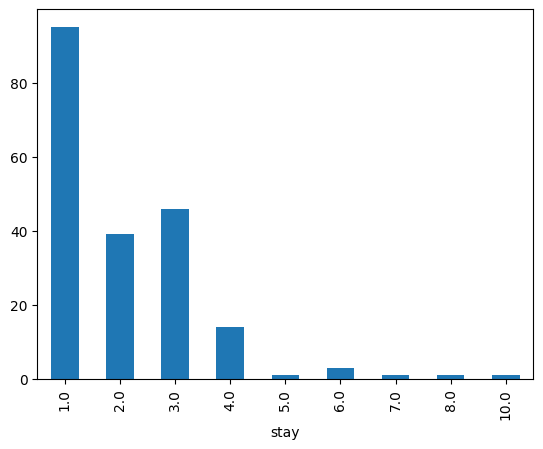

In [8]:
grouped_stay["count_int"].plot(kind="bar")

In [9]:
score_columns = ["todep","tosc","toas"]
new_columns = ['average_phq', 'average_scs', 'average_as']
grouped_stay[new_columns] = drop_na_students.groupby("stay")[score_columns].agg({'todep':np.mean,'tosc':np.mean,'toas':np.mean}).round(2)
grouped_stay

C:\Users\popol\AppData\Local\Temp\ipykernel_8408\4192242177.py:3: FutureWarning: The provided callable <function mean at 0x0000025CBD349760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_stay[new_columns] = drop_na_students.groupby("stay")[score_columns].agg({'todep':np.mean,'tosc':np.mean,'toas':np.mean}).round(2)


count_int  average_phq  average_scs  average_as
stay                                                 
1.0          95         7.48        38.11       72.80
2.0          39         8.28        37.08       77.67
3.0          46         9.09        37.13       78.00
4.0          14         8.57        33.93       87.71
5.0           1         0.00        34.00       91.00
6.0           3         6.00        38.00       58.67
7.0           1         4.00        48.00       45.00
8.0           1        10.00        44.00       65.00
10.0          1        13.00        32.00       50.00

<Axes: xlabel='stay'>

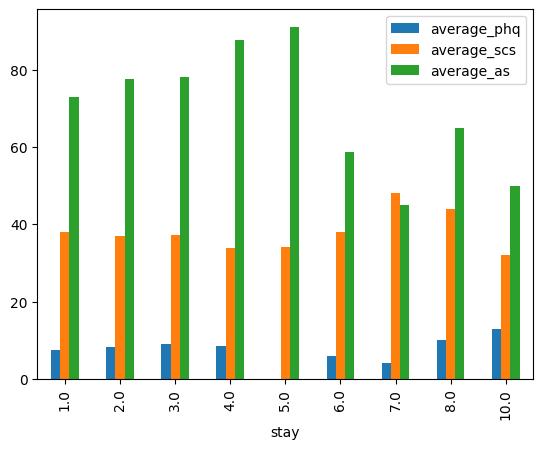

In [10]:
grouped_stay[new_columns].plot(kind="bar")

## Solution For DataCamp

In [11]:
df = grouped_stay.sort_values("stay",ascending=False).reset_index()
print(df)
print(df.shape)

   stay  count_int  average_phq  average_scs  average_as
0  10.0          1        13.00        32.00       50.00
1   8.0          1        10.00        44.00       65.00
2   7.0          1         4.00        48.00       45.00
3   6.0          3         6.00        38.00       58.67
4   5.0          1         0.00        34.00       91.00
5   4.0         14         8.57        33.93       87.71
6   3.0         46         9.09        37.13       78.00
7   2.0         39         8.28        37.08       77.67
8   1.0         95         7.48        38.11       72.80
(9, 5)
